1 Opérations de base d'un réseau ConvNet

In [6]:
#Demander n, m 
n = int(input("Entrer la valeur n:"))
m = int(input("Entrer la valeur m:"))

In [7]:
#Remplir aléatoirement l'image I de taille nxn entre 0 et 255
import numpy as np
I = np.random.randint(0, 256, (n, n))
print("Image I:")
print(I)

Image I:
[[208 198 227 123  28  32 204 242  17 226]
 [ 72  84 249 250 198 115 207 117 203 167]
 [238 140 224  87  41   0 103 196  90 152]
 [209   8  66 193 180 138  84  43 183 177]
 [ 49 183 152  16  23  57  69 238 235  18]
 [ 84 153   3 114  85  10  88 196  16 209]
 [129  54 167  76  65  47 197 107  45  54]
 [176 246 165 229  74 117 252 255 230   0]
 [ 98  24  65 224 111 135 131 138  81 160]
 [183 126 225   1 105 252  27  97 220 187]]


In [8]:
#Normaliser l'image I entre 0 et 1
I_normalized = I / 255.0
print("Image I normalisée:")
print(I_normalized)

Image I normalisée:
[[0.81568627 0.77647059 0.89019608 0.48235294 0.10980392 0.1254902
  0.8        0.94901961 0.06666667 0.88627451]
 [0.28235294 0.32941176 0.97647059 0.98039216 0.77647059 0.45098039
  0.81176471 0.45882353 0.79607843 0.65490196]
 [0.93333333 0.54901961 0.87843137 0.34117647 0.16078431 0.
  0.40392157 0.76862745 0.35294118 0.59607843]
 [0.81960784 0.03137255 0.25882353 0.75686275 0.70588235 0.54117647
  0.32941176 0.16862745 0.71764706 0.69411765]
 [0.19215686 0.71764706 0.59607843 0.0627451  0.09019608 0.22352941
  0.27058824 0.93333333 0.92156863 0.07058824]
 [0.32941176 0.6        0.01176471 0.44705882 0.33333333 0.03921569
  0.34509804 0.76862745 0.0627451  0.81960784]
 [0.50588235 0.21176471 0.65490196 0.29803922 0.25490196 0.18431373
  0.77254902 0.41960784 0.17647059 0.21176471]
 [0.69019608 0.96470588 0.64705882 0.89803922 0.29019608 0.45882353
  0.98823529 1.         0.90196078 0.        ]
 [0.38431373 0.09411765 0.25490196 0.87843137 0.43529412 0.52941176
 

In [9]:
#Remplir aléatoirement le filtre W de taille mxm entre -1 et 1
W = np.random.uniform(-1, 1, (m, m))
print("Filtre W:")
print(W)

Filtre W:
[[ 0.23635111 -0.44932748  0.90065077  0.32406305  0.59652516  0.45756797
   0.59878449 -0.10722938]
 [ 0.78732513 -0.56275568  0.90054585  0.01884121 -0.37728721 -0.60055129
  -0.90869502 -0.12927083]
 [-0.59260234  0.22031881  0.99655718 -0.47373989  0.57069364  0.51567777
  -0.97113891  0.49891144]
 [-0.51017993  0.69864809 -0.41733946  0.95809756 -0.8787882   0.79410334
  -0.91690635  0.19316698]
 [ 0.09885628 -0.98266323  0.64402308 -0.61936911  0.01236505  0.78452648
  -0.52707572 -0.33167571]
 [-0.51560461  0.65031606 -0.00465581  0.9431088   0.69537353 -0.33338551
  -0.52155709 -0.56205084]
 [-0.9456591   0.46051872  0.1476143  -0.78913363 -0.59577003 -0.60528216
   0.22805205  0.15703286]
 [-0.09813066 -0.91960942  0.75566416 -0.10356727  0.02348826  0.32415831
   0.0680727   0.46315976]]


In [10]:
#Calcule de la matrice de la convolution (fomule = somme I[i+num1][j+num2]*W[num1][num2]  pour num1 et num2 de 0 à m-1)
#puis ajout du biais 1.0
#application de la fonction d'activation sigmoïde (sigmoïde(x) = 1/(1+exp(-x)))

taille_conv = n - m + 1
conv_matrix = np.zeros((taille_conv, taille_conv))
biais = 1.0
for num1 in range(taille_conv):
    for num2 in range(taille_conv):
        for num11 in range(m):
            for num22 in range(m):
                conv_matrix[num1, num2] += I_normalized[num1 + num11, num2 + num22] * W[num11, num22]
                val = conv_matrix[num1, num2] + biais
                conv_matrix[num1, num2] = 1 / (1 + np.exp(-val))
print("Matrice de convolution après application du biais et de la fonction sigmoïde:")
print(conv_matrix)

Matrice de convolution après application du biais et de la fonction sigmoïde:
[[0.91202089 0.90846753 0.86722431]
 [0.89309515 0.88281798 0.89671714]
 [0.88562342 0.90627952 0.90148358]]


In [11]:
#Ajouter une couche de pooling (prendre la fonction max comme fonction de pooling).
#Il y aurait une petite précaution à prendre dans le cas ou taille_conv est impair

taille_pool = int(taille_conv/2) 

pool = np.zeros((taille_pool, taille_pool))

for num1 in range(taille_pool):
    for num2 in range(taille_pool):
        val = max(conv_matrix[2*num1,2*num2],conv_matrix[2*num1,2*num2+1],conv_matrix[2*num1+1,2*num2],conv_matrix[2*num1+1,2*num2+1])
        pool[num1,num2] = val
print("Matrice après pooling:")
print(pool)

Matrice après pooling:
[[0.91202089]]


2 - Récupération et étude des données MNIST

In [33]:
#1. Rcupérez les données MNIST
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
#Récupération et étude des données

data = mnist.load_data()

In [34]:
#2 - Pour chaque composante des données vérifiez ses dimensions, le type de son contenu et les valeurs extrêmales.
data1 = data[0]
data2 = data[1]

print (type(data1))
print(len(data1))

print (type(data2))
print(len(data2))

<class 'tuple'>
2
<class 'tuple'>
2


In [35]:
#Le type
data11 = data1[0]
data12 = data1[1]

data21 = data2[0]
data22 = data2[1]

print(type(data11))
print(type(data12))
print(type(data21))
print(type(data22))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [36]:
#Dimensions
print(np.shape(data11))
print(np.shape(data12))
print(np.shape(data21))
print(np.shape(data22))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


60 000 images de tailles 28x28 (Train)
10 000 images de tailles 28x28 (Test)

In [37]:
#valeurs extrêmales
print(np.min(data11))
print(np.max(data11))

0
255


In [38]:
#valeurs extrêmales
print(np.min(data12))
print(np.max(data12))

0
9


In [39]:
#valeurs extrêmales
print(np.min(data21))
print(np.max(data21))

0
255


In [40]:
#valeurs extrêmales
print(np.min(data22))
print(np.max(data22))

0
9


In [44]:
#3 - Transformez l'ensemble des images d'apprentissage (resp. de test) en une seule matrice de réels compris entre 0 et 1

# Conversion en float et normalisation dans [0,1]
X_train = data11.astype('float32') / 255.0
X_test  = data21.astype('float32') / 255.0

# Aplatir chaque image en un vecteur de 28*28 = 784 valeurs
X_train = X_train.reshape((X_train.shape[0], -1))
X_test  = X_test.reshape((X_test.shape[0], -1))

# Vérifications
print("X_train shape:", X_train.shape, "dtype:", X_train.dtype, "min:", X_train.min(), "max:", X_train.max())
print("X_test  shape:", X_test.shape,  "dtype:", X_test.dtype,  "min:", X_test.min(),  "max:", X_test.max())

print("Labels shapes (train, test):", data12.shape, data22.shape)
if X_train.shape[0] != data12.shape[0] or X_test.shape[0] != data22.shape[0]:
    raise ValueError("Mismatch entre le nombre d'images et d'étiquettes")

X_train shape: (60000, 784) dtype: float32 min: 0.0 max: 1.0
X_test  shape: (10000, 784) dtype: float32 min: 0.0 max: 1.0
Labels shapes (train, test): (60000,) (10000,)


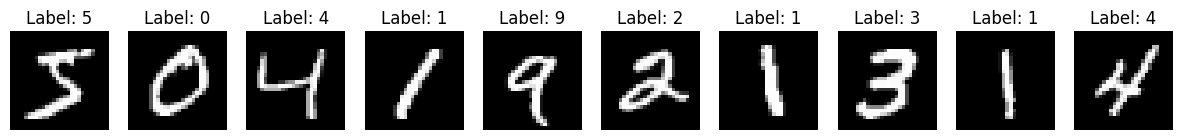

In [57]:
#4. Visualisez quelques images
nb_images_display = 10
fig, axes = plt.subplots(1, nb_images_display, figsize=(15,5))
for i in range(nb_images_display):
    axes[i].imshow(data11[i], cmap='gray')
    axes[i].set_title(f"Label: {data12[i]}")
    axes[i].axis('off')


4 - Keras/Tensorow : notre premier réseau ConvNet